In [ ]:
!pip install -U scikit-learn imbalanced-learn xgboost

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:

!pip install -U scikit-learn

  Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [ ]:
# Cargar datos
df = pd.read_csv("tema_conversaciones.csv")
df.head()

,ticket_id,respuesta
0,150156525929,Problemas con transacciones bloqueadas en la t...
1,150156528181,Problemas con promociones y cashback en la pla...
2,150156564239,Problemas en la atención o comunicación
3,150156565768,Agradecimiento por atención al cliente
4,150156591201,Problemas con descuentos y condiciones de uso


In [ ]:
# Verificación general
print(df.info())
print(df.isnull().sum())  # Verificar valores nulos
print("Duplicados:", df.duplicated().sum())

# Revisar respuestas vacías
vacias = df['respuesta'].apply(lambda x: isinstance(x, str) and x.strip() == "").sum()
print("Respuestas vacías:", vacias)

# Estadísticas de longitud del texto
df['longitud_respuesta'] = df['respuesta'].astype(str).apply(len)
print(df['longitud_respuesta'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ticket_id  341 non-null    int64 
 1   respuesta  341 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.5+ KB
None
ticket_id    0
respuesta    0
dtype: int64
Duplicados: 0
Respuestas vacías: 0
count    341.000000
mean      44.483871
std       13.103341
min       15.000000
25%       35.000000
50%       43.000000
75%       53.000000
max       96.000000
Name: longitud_respuesta, dtype: float64


In [ ]:

#Convierte el texto a vectores numéricos usando TF-IDF.
#Elimina palabras comunes (stopwords) para enfocarte en lo importante.
manual_stopwords = [
    "de", "la", "que", "el", "en", "y", "a", "los", "del", "se", "las", "por", "un", "para",
    "con", "no", "una", "su", "al", "lo", "como", "más", "pero", "sus", "le", "ya", "o",
    "este", "sí", "porque", "esta", "entre", "cuando", "muy", "sin", "sobre", "también",
    "me", "hasta", "hay", "donde", "quien", "desde", "todo", "nos", "durante", "todos",
    "uno", "les", "ni", "contra", "otros", "ese", "eso", "ante", "ellos", "e", "esto", "mí"
]

vectorizer = TfidfVectorizer(stop_words=manual_stopwords)
X_tfidf = vectorizer.fit_transform(df['respuesta'])

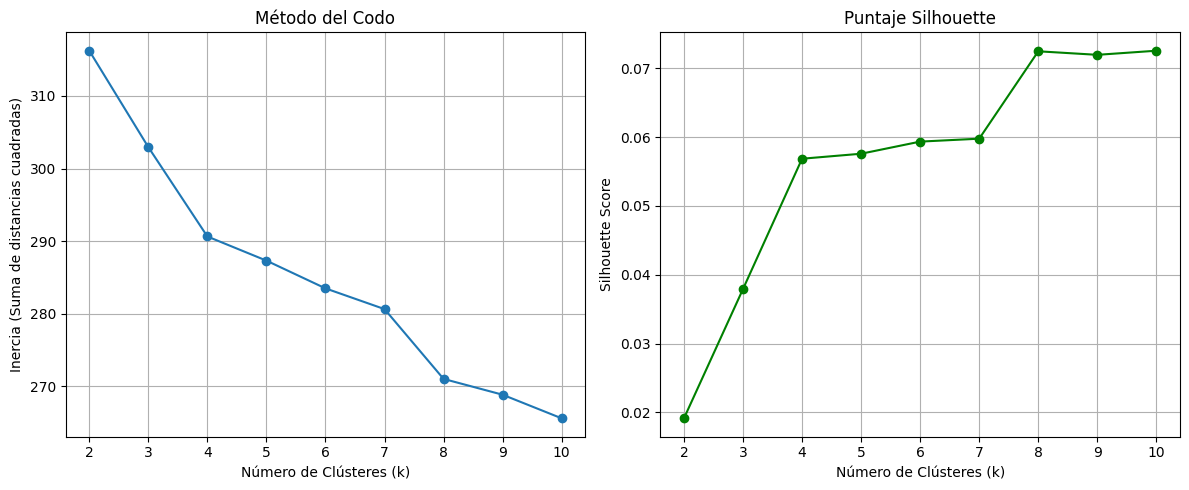

In [ ]:
#Definir rango de k (número de clusters a probar)

k_values = list(range(2, 11))  # Probaremos desde k=2 hasta k=10
inertia_values = []           # Para guardar la inercia (método del codo)
silhouette_scores = []        # Para guardar los puntajes silhouette

# Calcular métricas para cada k

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_tfidf)  # Usa el TF-IDF calculado previamente
    inertia_values.append(model.inertia_)  # Cuánto "cuesta" agrupar los datos
    labels = model.labels_
    score = silhouette_score(X_tfidf, labels)
    silhouette_scores.append(score)  # Qué tan bien separados están los clusters


# Visualizar resultados

plt.figure(figsize=(12, 5))

# Método del Codo
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title("Método del Codo")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Inercia (Suma de distancias cuadradas)")
plt.grid(True)

# Método del Silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title("Puntaje Silhouette")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Clustering con K=9
kmeans = KMeans(n_clusters=9, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf)

# Visualización con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())
df['pca_x'] = X_pca[:, 0]
df['pca_y'] = X_pca[:, 1]

# Palabras clave por clúster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
top_terms_per_cluster = {
    i: [terms[ind] for ind in order_centroids[i, :5]] for i in range(9)
}

# Ejemplos por clúster
ejemplos_por_cluster = {
    f"Clúster {i}": df[df['cluster'] == i]['respuesta'].head(3).tolist()
    for i in range(9)
}

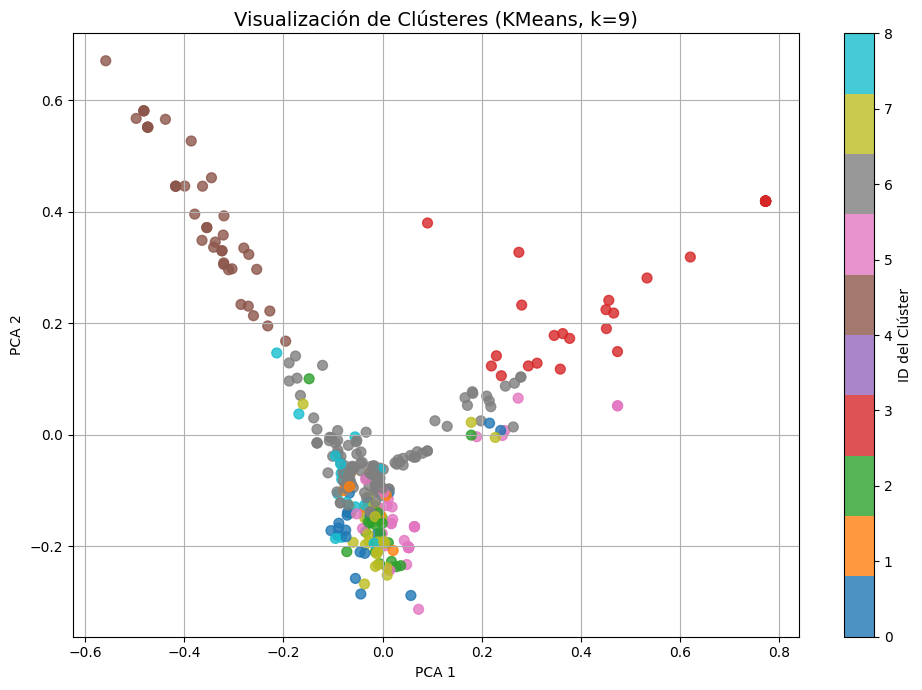

In [ ]:
# Crear visualización de los clusters en 2D con colores distintos
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['pca_x'], df['pca_y'], c=df['cluster'], cmap='tab10', s=50, alpha=0.8)
plt.title("Visualización de Clústeres (KMeans, k=9)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label='ID del Clúster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Mostrar ejemplos de conversaciones por clúster y palabras clave para k =9
for cluster_id, ejemplos in ejemplos_por_cluster.items():
    print(f"--- {cluster_id} ---")
    print(f"Palabras clave: {', '.join(top_terms_per_cluster[int(cluster_id.split(' ')[1])])}")
    print("Ejemplos:")
    for i, ejemplo in enumerate(ejemplos):
        print(f"  {i+1}. {ejemplo[:100]}...") # Mostrar los primeros 100 caracteres como ejemplo
    print("\n")


--- Clúster 0 ---
Palabras clave: descuentos, cashback, problemas, beneficios, uso
Ejemplos:
  1. Problemas con promociones y cashback en la plataforma...
  2. Problemas con descuentos y condiciones de uso...
  3. Consulta sobre descuentos y uso en restaurantes...


--- Clúster 1 ---
Palabras clave: programa, funcionalidad, clubers, beneficios, aceptación
Ejemplos:
  1. Problemas con aceptación de beneficios en establecimientos...
  2. Problemas con la funcionalidad de la barra de búsqueda...
  3. Descuento y requisitos iniciales en el programa de fidelidad...


--- Clúster 2 ---
Palabras clave: pago, problemas, métodos, método, proceso
Ejemplos:
  1. Problemas con proceso de pago y visualización de cargo en la app...
  2. Dificultad para realizar el pago en el restaurante...
  3. Modo de pago y utilización de la aplicación...


--- Clúster 3 ---
Palabras clave: cuenta, acceso, problemas, verificación, activación
Ejemplos:
  1. Problemas de activación de cuenta y acceso al programa de 

In [ ]:
# Diccionario de nombres temáticos y respuestas cerradas
cluster_info = {
    0: {
        "tema": "Soporte técnico",
        "respuesta": "Gracias por contactarnos. Hemos canalizado tu caso al área de soporte técnico. En breve recibirás atención personalizada."
    },
    1: {
        "tema": "Problemas con códigos",
        "respuesta": "Si no recibiste tu código de verificación, por favor revisa tu bandeja de spam o responde con la palabra *REENVIAR*."
    },
    2: {
        "tema": "Acceso o registro de cuenta",
        "respuesta": "¿Estás teniendo problemas para acceder o registrarte? Verifica que estés usando el correo o número correcto y cuéntanos qué ves."
    },
    3: {
        "tema": "Atención al cliente",
        "respuesta": "Lamentamos cualquier inconveniente. Nuestro equipo de atención al cliente ya está revisando tu solicitud."
    },
    4: {
        "tema": "Problemas con pagos",
        "respuesta": "Por favor verifica si tu pago se reflejó en la app. Si no, responde con *NO REFLEJADO* y te ayudamos de inmediato."
    },
    5: {
        "tema": "Fallas técnicas en la app",
        "respuesta": "Te recomendamos actualizar la app desde la tienda. Si el problema persiste, responde con *ERROR* y lo escalaremos."
    },
    6: {
        "tema": "Consultas generales",
        "respuesta": "Gracias por tu mensaje. ¿Podrías describir tu duda o necesidad? Te orientamos de inmediato."
    },
    7: {
        "tema": "Problemas con promociones",
        "respuesta": "Lamentamos que la promoción no haya sido aplicada. Comparte el nombre del establecimiento y te ayudaremos."
    },
    8: {
        "tema": "Métodos de pago",
        "respuesta": "¿Qué método intentaste usar? Comparte si fue tarjeta, QR o efectivo para darte una mejor solución."
    }
}

In [ ]:
# Crear columnas nuevas en df con el tema y la respuesta
df['tema'] = df['cluster'].map(lambda x: cluster_info[x]['tema'])
df['respuesta_chatbot'] = df['cluster'].map(lambda x: cluster_info[x]['respuesta'])

In [ ]:
# 2. Preparar texto y etiquetas
X = df["respuesta"]
y = df["cluster"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(stop_words=manual_stopwords)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}


Modelo: Logistic Regression
Accuracy: 0.8986
F1 Score: 0.8823
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      0.90      0.95        10
           5       0.71      1.00      0.83         5
           6       0.87      1.00      0.93        34
           7       1.00      0.71      0.83         7
           8       1.00      0.50      0.67         2

    accuracy                           0.90        69
   macro avg       0.84      0.75      0.78        69
weighted avg       0.89      0.90      0.88        69



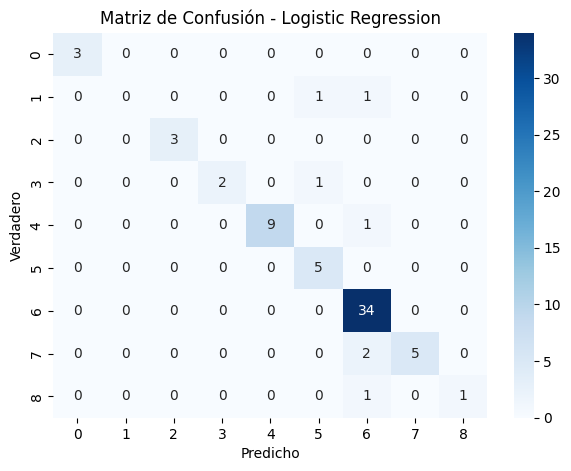


Modelo: Random Forest
Accuracy: 0.9275
F1 Score: 0.9249
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2
           2       1.00      0.67      0.80         3
           3       1.00      0.67      0.80         3
           4       0.83      1.00      0.91        10
           5       0.83      1.00      0.91         5
           6       0.97      0.94      0.96        34
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         2

    accuracy                           0.93        69
   macro avg       0.93      0.86      0.88        69
weighted avg       0.94      0.93      0.92        69



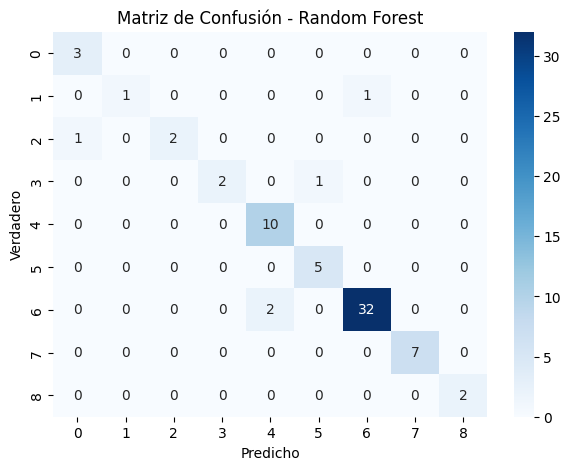


Modelo: XGBoost
Accuracy: 0.9130
F1 Score: 0.8999
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.00      0.00      0.00         2
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       0.91      1.00      0.95        10
           5       0.80      0.80      0.80         5
           6       0.97      0.97      0.97        34
           7       0.86      0.86      0.86         7
           8       0.67      1.00      0.80         2

    accuracy                           0.91        69
   macro avg       0.77      0.81      0.78        69
weighted avg       0.89      0.91      0.90        69



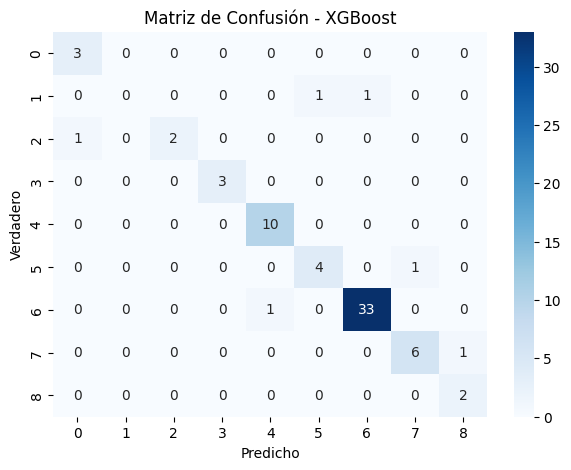

In [ ]:
resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train_tfidf, y_train)
    y_pred = modelo.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nModelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_pred))

    # Guardar resultados
    resultados[nombre] = {"modelo": modelo, "accuracy": acc, "f1": f1, "predicciones": y_pred}

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicho')
    plt.ylabel('Verdadero')
    plt.show()

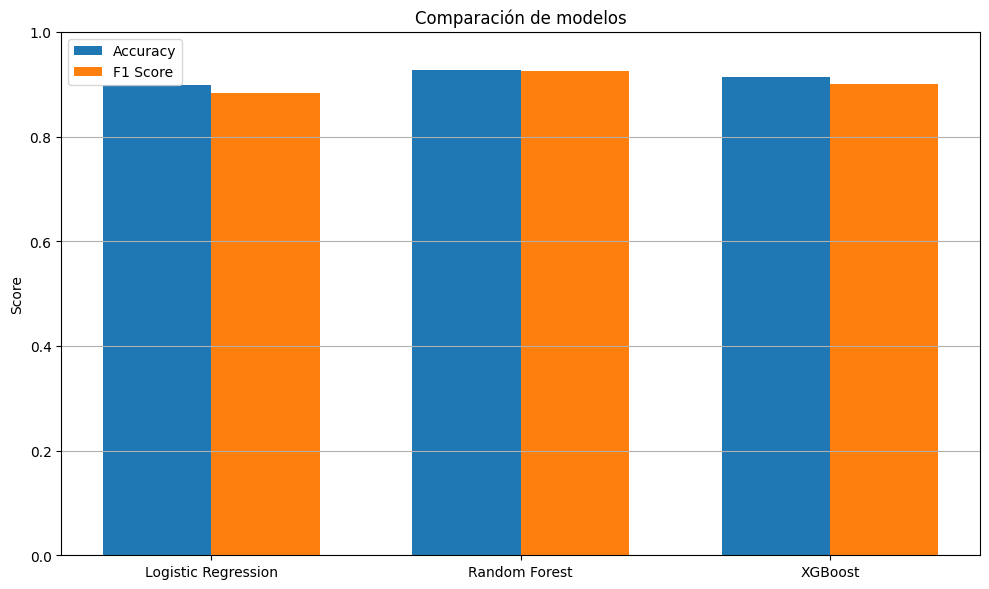

In [ ]:
import matplotlib.pyplot as plt

model_names = list(resultados.keys())
accuracies = [resultados[n]["accuracy"] for n in model_names]
f1_scores = [resultados[n]["f1"] for n in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='F1 Score')

plt.ylabel('Score')
plt.title('Comparación de modelos')
plt.xticks(x, model_names)
plt.ylim(0,1)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


--- Ajuste de Hiperparámetros con GridSearchCV (k=7) ---

Iniciando GridSearchCV para: Logistic Regression

Modelo (GS, k=7): Logistic Regression
Mejores parámetros: {'C': 100, 'penalty': 'l2'}
Mejor F1 (entrenamiento CV): 0.8703
Accuracy (test): 0.9275
F1 Score (test): 0.9261
Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       1.00      1.00      1.00         2
           2       0.93      0.78      0.85        18
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8
           5       0.90      1.00      0.95         9
           6       1.00      1.00      1.00         3

    accuracy                           0.93        69
   macro avg       0.95      0.96      0.96        69
weighted avg       0.93      0.93      0.93        69



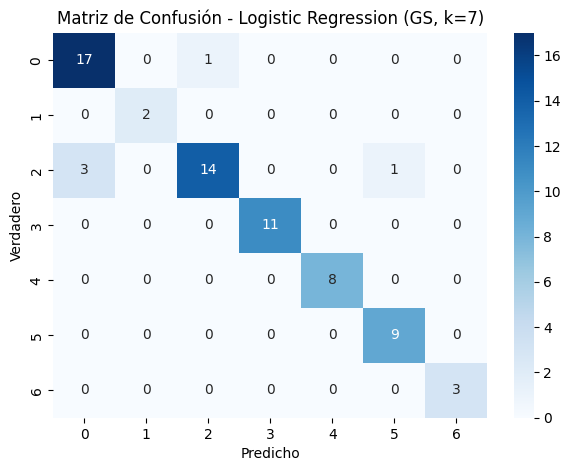


Iniciando GridSearchCV para: Random Forest

Modelo (GS, k=7): Random Forest
Mejores parámetros: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Mejor F1 (entrenamiento CV): 0.8848
Accuracy (test): 0.9565
F1 Score (test): 0.9555
Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       1.00      0.50      0.67         2
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        11
           4       1.00      1.00      1.00         8
           5       0.82      1.00      0.90         9
           6       1.00      1.00      1.00         3

    accuracy                           0.96        69
   macro avg       0.96      0.91      0.92        69
weighted avg       0.96      0.96      0.96        69



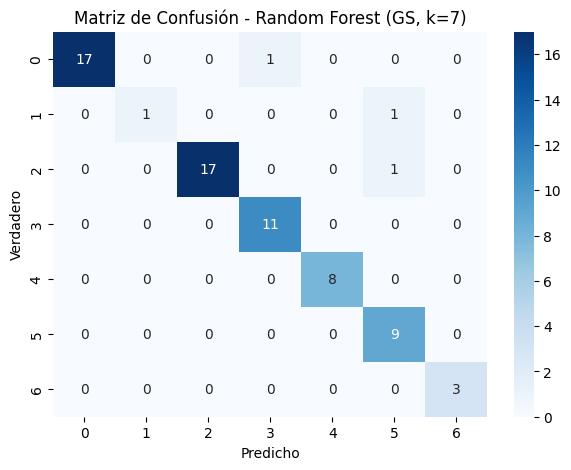


Iniciando GridSearchCV para: XGBoost

Modelo (GS, k=7): XGBoost
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Mejor F1 (entrenamiento CV): 0.9035
Accuracy (test): 0.9565
F1 Score (test): 0.9561
Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       1.00      1.00      1.00         2
           2       0.95      1.00      0.97        18
           3       0.91      0.91      0.91        11
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         3

    accuracy                           0.96        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.96      0.96      0.96        69



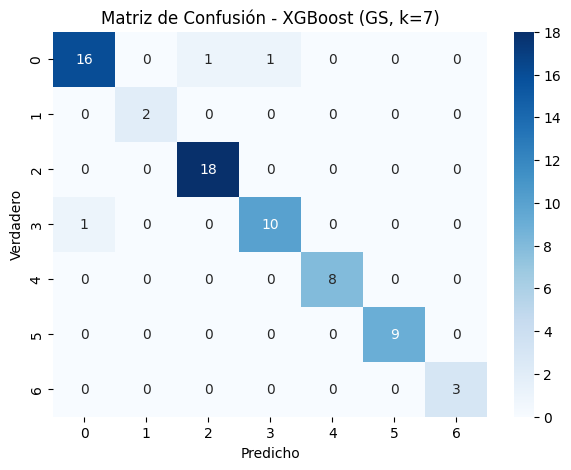

In [ ]:

# Clustering con K=7
kmeans_7 = KMeans(n_clusters=7, random_state=42)
df['cluster_7'] = kmeans_7.fit_predict(X_tfidf)

# Preparar datos para k=7
y_7 = df["cluster_7"]
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(X, y_7, test_size=0.2, random_state=42)

# Vectorizar para k=7

X_train_tfidf_7 = vectorizer.fit_transform(X_train_7)
X_test_tfidf_7 = vectorizer.transform(X_test_7)


# Definir el espacio de parámetros para cada modelo (asegúrate de que param_grid_lr, param_grid_rf, param_grid_xgb están definidos)
# Si no están definidos en celdas anteriores, deberás definirlos aquí o en una celda previa.
# Suponiendo que están definidos en la celda 1dryotrjsyDp


# Realizar GridSearchCV para cada modelo en el conjunto de datos k=7
modelos_con_gs_7 = {
    "Logistic Regression": GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=3, scoring='f1_weighted'),
    "Random Forest": GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1_weighted'),
    "XGBoost": GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), param_grid_xgb, cv=3, scoring='f1_weighted')
}

resultados_gs_7 = {}

print("\n--- Ajuste de Hiperparámetros con GridSearchCV (k=7) ---")

for nombre, gs in modelos_con_gs_7.items():
    print(f"\nIniciando GridSearchCV para: {nombre}")
    # Usar los datos vectorizados para k=7
    gs.fit(X_train_tfidf_7, y_train_7)

    best_model = gs.best_estimator_
    y_pred_gs = best_model.predict(X_test_tfidf_7)

    acc_gs = accuracy_score(y_test_7, y_pred_gs)
    f1_gs = f1_score(y_test_7, y_pred_gs, average='weighted')

    print(f"\nModelo (GS, k=7): {nombre}")
    print(f"Mejores parámetros: {gs.best_params_}")
    print(f"Mejor F1 (entrenamiento CV): {gs.best_score_:.4f}")
    print(f"Accuracy (test): {acc_gs:.4f}")
    print(f"F1 Score (test): {f1_gs:.4f}")
    print("Reporte de clasificación (test):")
    print(classification_report(y_test_7, y_pred_gs))

    resultados_gs_7[nombre] = {
        "modelo": best_model,
        "accuracy": acc_gs,
        "f1": f1_gs,
        "predicciones": y_pred_gs,
        "best_params": gs.best_params_,
        "best_score_cv": gs.best_score_
    }

    # Matriz de confusión para el mejor modelo
    cm_gs = confusion_matrix(y_test_7, y_pred_gs)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm_gs, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre} (GS, k=7)')
    plt.xlabel('Predicho')
    plt.ylabel('Verdadero')
    plt.show()

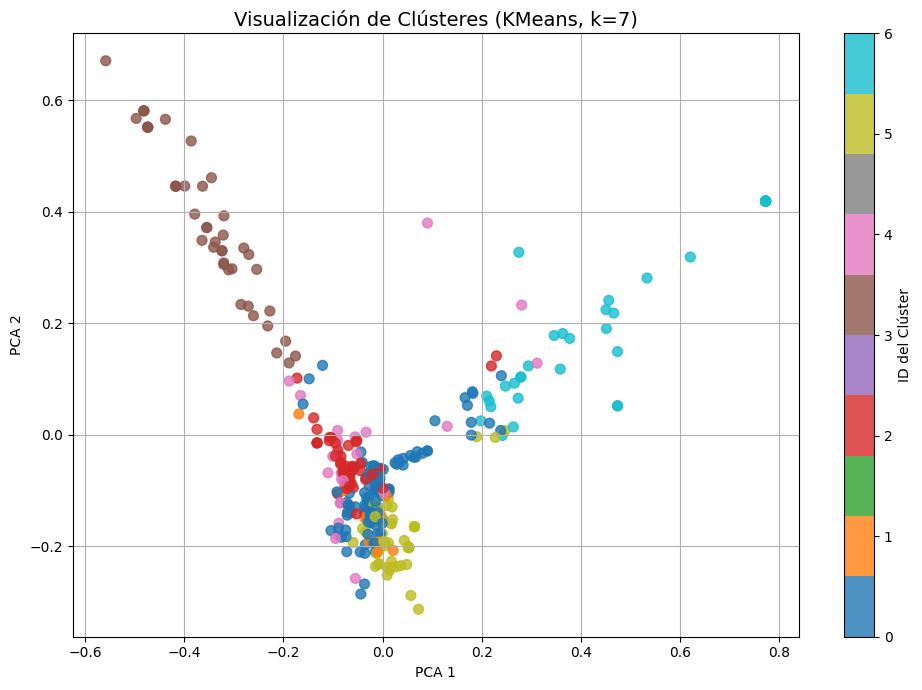


--- Ejemplos de Conversaciones y Palabras Clave por Clúster (k=7) ---

--- Clúster 0 ---
Palabras clave: problemas, descuentos, pago, app, código
Ejemplos:
  1. Problemas con transacciones bloqueadas en la terminal...
  2. Problemas con promociones y cashback en la plataforma...
  3. Problemas con descuentos y condiciones de uso...

--- Clúster 1 ---
Palabras clave: clubers, funcionalidad, app, problemas, pagos
Ejemplos:
  1. Problemas con la funcionalidad de la barra de búsqueda...
  2. Restricciones en promociones para socios Clubers...
  3. Problemas con la utilización del sistema de pago con Clubers...

--- Clúster 2 ---
Palabras clave: reembolso, gestión, comunicación, información, tickets
Ejemplos:
  1. Dificultad en realizar un pedido en la app...
  2. Gestión de tickets y soporte técnico...
  3. Discrepancias en el cálculo de reembolso...

--- Clúster 3 ---
Palabras clave: atención, cliente, socios, soporte, comunicación
Ejemplos:
  1. Problemas en la atención o comunicación..

In [ ]:
# prompt: Muestrame ejemplos de conversaciones clasificadas para k=7

# Visualización con PCA para k=7
pca_7 = PCA(n_components=2)
X_pca_7 = pca_7.fit_transform(X_tfidf.toarray()) # Usa el TF-IDF original para consistencia
df['pca_x_7'] = X_pca_7[:, 0]
df['pca_y_7'] = X_pca_7[:, 1]

# Palabras clave por clúster para k=7
order_centroids_7 = kmeans_7.cluster_centers_.argsort()[:, ::-1]
top_terms_per_cluster_7 = {
    i: [terms[ind] for ind in order_centroids_7[i, :5]] for i in range(7)
}

# Ejemplos por clúster para k=7
ejemplos_por_cluster_7 = {
    f"Clúster {i}": df[df['cluster_7'] == i]['respuesta'].head(3).tolist()
    for i in range(7)
}

# Crear visualización de los clusters en 2D con colores distintos para k=7
plt.figure(figsize=(10, 7))
scatter_7 = plt.scatter(df['pca_x_7'], df['pca_y_7'], c=df['cluster_7'], cmap='tab10', s=50, alpha=0.8)
plt.title("Visualización de Clústeres (KMeans, k=7)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter_7, label='ID del Clúster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar ejemplos de conversaciones por clúster y palabras clave para k=7
print("\n--- Ejemplos de Conversaciones y Palabras Clave por Clúster (k=7) ---")
for cluster_id, ejemplos in ejemplos_por_cluster_7.items():
    cluster_num = int(cluster_id.split(' ')[1])
    print(f"\n--- {cluster_id} ---")
    print(f"Palabras clave: {', '.join(top_terms_per_cluster_7[cluster_num])}")
    print("Ejemplos:")
    if ejemplos:
        for i, ejemplo in enumerate(ejemplos):
            print(f"  {i+1}. {ejemplo[:100]}...") # Mostrar los primeros 100 caracteres como ejemplo
    else:
        print("  No hay ejemplos en este clúster en el head.")

In [ ]:
cluster_info_7 = {
    0: {
        "tema": "Problemas de Acceso/Registro",
        "respuesta": "¿Estás teniendo problemas para acceder o registrarte en tu cuenta? Por favor, verifica que estés usando el correo o número correcto y detállanos qué error visualizas para poder ayudarte."
    },
    1: {
        "tema": "Consultas Generales/Información",
        "respuesta": "Gracias por tu mensaje. Para poder brindarte la mejor ayuda, por favor, sé más específico sobre tu duda o necesidad. ¿Podrías describir qué información buscas o qué tema te interesa?"
    },
    2: {
        "tema": "Problemas con Pagos/Cobros",
        "respuesta": "¿Estás experimentando inconvenientes con un pago o un cobro? Por favor, detalla el problema y, si aplica, comparte el monto o referencia para que podamos investigar tu caso de inmediato."
    },
    3: {
        "tema": "Fallas Técnicas/Errores de la App",
        "respuesta": "Lamentamos que estés teniendo problemas técnicos. Te recomendamos verificar tu conexión a internet y si tienes la última versión de la app. Si el error persiste, descríbelo y, si es posible, adjunta una captura de pantalla."
    },
    4: {
        "tema": "Soporte/Atención al Cliente General",
        "respuesta": "Entendemos tu situación. Hemos escalado tu caso a nuestro equipo de soporte al cliente. Ellos revisarán tu solicitud y se pondrán en contacto contigo a la brevedad para brindarte una solución."
    },
    5: {
        "tema": "Códigos de Verificación/Reenvío",
        "respuesta": "Si no recibiste tu código de verificación, por favor, revisa tu bandeja de spam. Si aún así no lo encuentras, responde con la palabra *REENVIAR* para que podamos enviártelo nuevamente."
    },
    6: {
        "tema": "Problemas con Promociones/Beneficios",
        "respuesta": "¿La promoción no se aplicó correctamente o tienes dudas sobre un beneficio? Por favor, especifica el nombre de la promoción o el establecimiento para que podamos revisar tu caso."
    }
}



--- Ajuste de Hiperparámetros con GridSearchCV (k=9) ---

Iniciando GridSearchCV para: Logistic Regression

Modelo (GS, k=9): Logistic Regression
Mejores parámetros: {'C': 100, 'penalty': 'l2'}
Mejor F1 (entrenamiento CV): 0.8554
Accuracy (test): 0.9565
F1 Score (test): 0.9537
Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       0.91      1.00      0.95        10
           5       0.83      1.00      0.91         5
           6       0.97      0.97      0.97        34
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         2

    accuracy                           0.96        69
   macro avg       0.97      0.90      0.92        69
weighted avg       0.96      0.96     

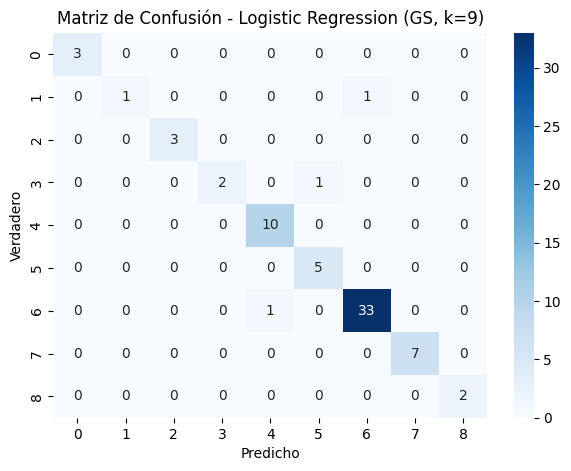


Iniciando GridSearchCV para: Random Forest

Modelo (GS, k=9): Random Forest
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mejor F1 (entrenamiento CV): 0.8727
Accuracy (test): 0.9275
F1 Score (test): 0.9249
Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2
           2       1.00      0.67      0.80         3
           3       1.00      0.67      0.80         3
           4       0.83      1.00      0.91        10
           5       0.83      1.00      0.91         5
           6       0.97      0.94      0.96        34
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         2

    accuracy                           0.93        69
   macro avg       0.93      0.86      0.88        69
weighted avg       0.94      0.93      0.92        69



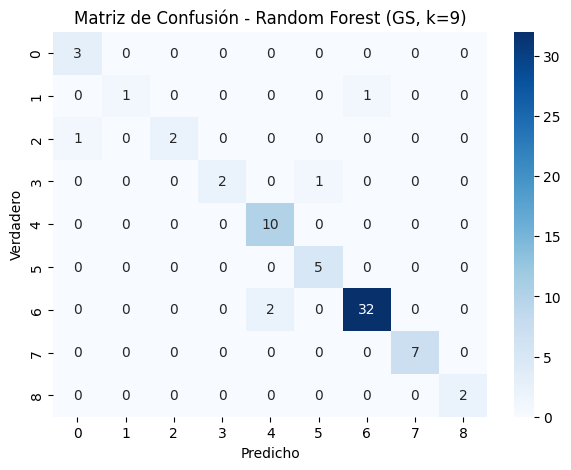


Iniciando GridSearchCV para: XGBoost

Modelo (GS, k=9): XGBoost
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}
Mejor F1 (entrenamiento CV): 0.8671
Accuracy (test): 0.9275
F1 Score (test): 0.9257
Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       0.91      1.00      0.95        10
           5       1.00      0.80      0.89         5
           6       0.97      0.97      0.97        34
           7       0.86      0.86      0.86         7
           8       0.67      1.00      0.80         2

    accuracy                           0.93        69
   macro avg       0.91      0.87      0.87        69
weighted avg       0.94      0.93      0.93        69



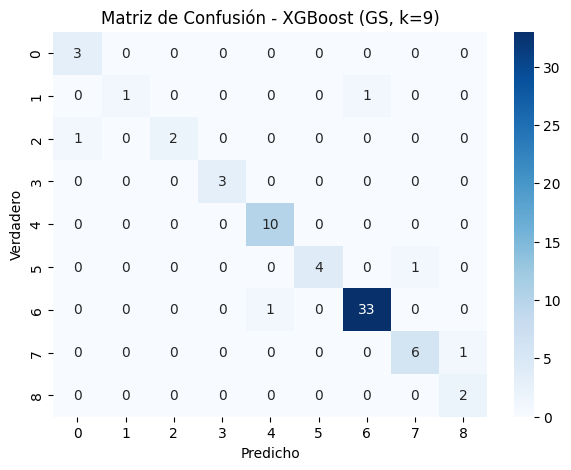

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de parámetros para cada modelo
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

# Realizar GridSearchCV para cada modelo en el conjunto de datos k=9
modelos_con_gs_9 = {
    "Logistic Regression": GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=3, scoring='f1_weighted'),
    "Random Forest": GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1_weighted'),
    "XGBoost": GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), param_grid_xgb, cv=3, scoring='f1_weighted')
}

resultados_gs_9 = {}

print("\n--- Ajuste de Hiperparámetros con GridSearchCV (k=9) ---")

for nombre, gs in modelos_con_gs_9.items():
    print(f"\nIniciando GridSearchCV para: {nombre}")
    gs.fit(X_train_tfidf, y_train)

    best_model = gs.best_estimator_
    y_pred_gs = best_model.predict(X_test_tfidf)

    acc_gs = accuracy_score(y_test, y_pred_gs)
    f1_gs = f1_score(y_test, y_pred_gs, average='weighted')

    print(f"\nModelo (GS, k=9): {nombre}")
    print(f"Mejores parámetros: {gs.best_params_}")
    print(f"Mejor F1 (entrenamiento CV): {gs.best_score_:.4f}")
    print(f"Accuracy (test): {acc_gs:.4f}")
    print(f"F1 Score (test): {f1_gs:.4f}")
    print("Reporte de clasificación (test):")
    print(classification_report(y_test, y_pred_gs))

    resultados_gs_9[nombre] = {
        "modelo": best_model,
        "accuracy": acc_gs,
        "f1": f1_gs,
        "predicciones": y_pred_gs,
        "best_params": gs.best_params_,
        "best_score_cv": gs.best_score_
    }

    # Matriz de confusión para el mejor modelo
    cm_gs = confusion_matrix(y_test, y_pred_gs)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm_gs, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre} (GS, k=9)')
    plt.xlabel('Predicho')
    plt.ylabel('Verdadero')
    plt.show()

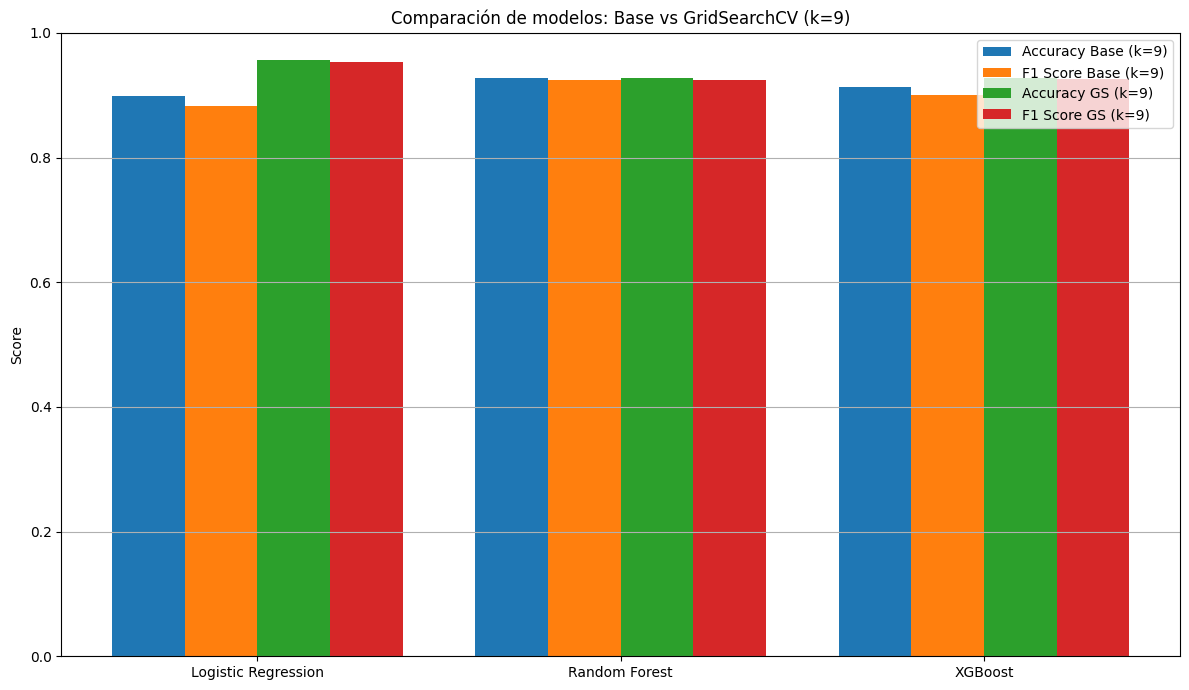

In [ ]:
# Comparación gráfica de resultados (Modelos base vs GS) para k=9

# Asegúrate de que 'resultados' y 'resultados_gs_9' estén definidos
if 'resultados' in globals() and 'resultados_gs_9' in globals():
    model_names = list(resultados.keys()) # Usa los nombres de los modelos base

    # Asegúrate de que las claves de los modelos base existan en resultados_gs_9
    if all(n in resultados_gs_9 for n in model_names):
        accuracies_base_9 = [resultados[n]["accuracy"] for n in model_names]
        f1_scores_base_9 = [resultados[n]["f1"] for n in model_names]

        accuracies_gs_9 = [resultados_gs_9[n]["accuracy"] for n in model_names]
        f1_scores_gs_9 = [resultados_gs_9[n]["f1"] for n in model_names]

        x = np.arange(len(model_names))
        width = 0.2

        plt.figure(figsize=(12,7))

        plt.bar(x - width, accuracies_base_9, width, label='Accuracy Base (k=9)')
        plt.bar(x, f1_scores_base_9, width, label='F1 Score Base (k=9)')
        plt.bar(x + width, accuracies_gs_9, width, label='Accuracy GS (k=9)')
        plt.bar(x + width*2, f1_scores_gs_9, width, label='F1 Score GS (k=9)')


        plt.ylabel('Score')
        plt.title('Comparación de modelos: Base vs GridSearchCV (k=9)')
        plt.xticks(x + width/2, model_names)
        plt.ylim(0,1)
        plt.legend()
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()
    else:
        print("\nSkipping comparison graph (Base vs GS k=9): Model names in 'resultados' not found in 'resultados_gs_9'.")
else:
    print("\nSkipping comparison graph (Base vs GS k=9): 'resultados' o 'resultados_gs_9' no encontrados.")

# La comparación gráfica para k=7 (Base vs GS) se ha eliminado de esta celda para evitar el NameError.
# Se generará una nueva celda para comparar los resultados de GridSearchCV entre k=7 y k=9.


--- Ajuste de Hiperparámetros con GridSearchCV (k=7) ---

Iniciando GridSearchCV para: Logistic Regression

Modelo (GS, k=7): Logistic Regression
Mejores parámetros: {'C': 100, 'penalty': 'l2'}
Mejor F1 (entrenamiento CV): 0.8554
Accuracy (test): 0.9565
F1 Score (test): 0.9537
Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       0.91      1.00      0.95        10
           5       0.83      1.00      0.91         5
           6       0.97      0.97      0.97        34
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         2

    accuracy                           0.96        69
   macro avg       0.97      0.90      0.92        69
weighted avg       0.96      0.96     

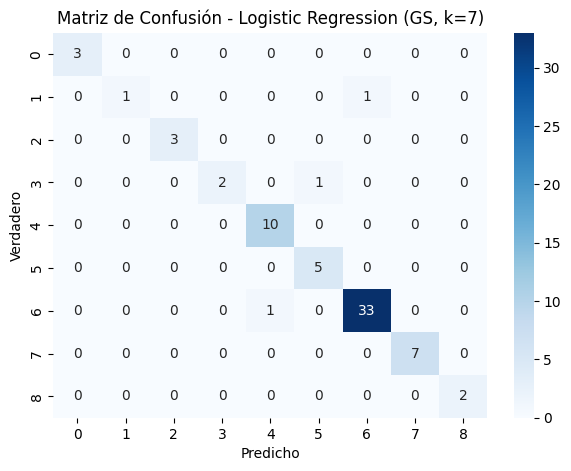


Iniciando GridSearchCV para: Random Forest

Modelo (GS, k=7): Random Forest
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mejor F1 (entrenamiento CV): 0.8727
Accuracy (test): 0.9275
F1 Score (test): 0.9249
Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2
           2       1.00      0.67      0.80         3
           3       1.00      0.67      0.80         3
           4       0.83      1.00      0.91        10
           5       0.83      1.00      0.91         5
           6       0.97      0.94      0.96        34
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         2

    accuracy                           0.93        69
   macro avg       0.93      0.86      0.88        69
weighted avg       0.94      0.93      0.92        69



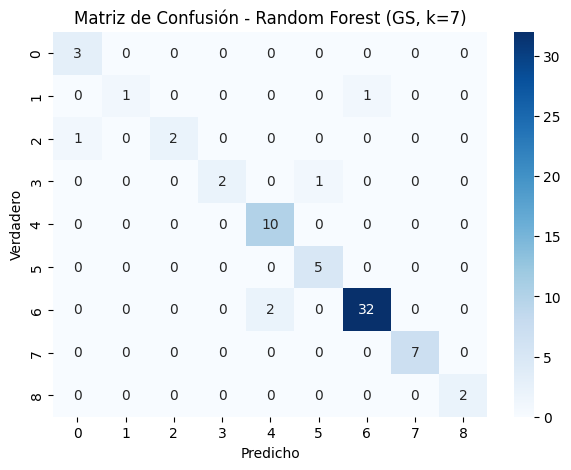


Iniciando GridSearchCV para: XGBoost

Modelo (GS, k=7): XGBoost
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}
Mejor F1 (entrenamiento CV): 0.8671
Accuracy (test): 0.9275
F1 Score (test): 0.9257
Reporte de clasificación (test):
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       0.91      1.00      0.95        10
           5       1.00      0.80      0.89         5
           6       0.97      0.97      0.97        34
           7       0.86      0.86      0.86         7
           8       0.67      1.00      0.80         2

    accuracy                           0.93        69
   macro avg       0.91      0.87      0.87        69
weighted avg       0.94      0.93      0.93        69



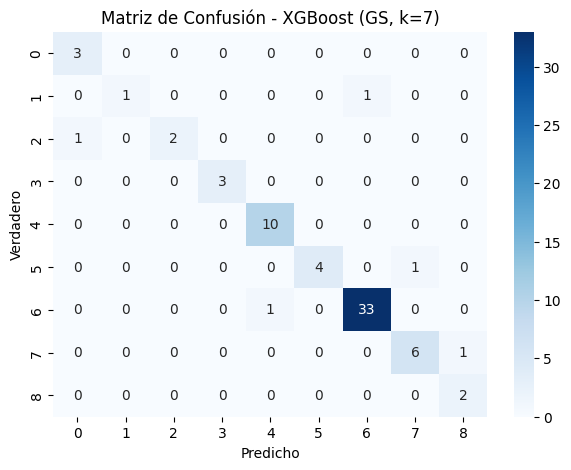

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de parámetros para cada modelo
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

# Realizar GridSearchCV para cada modelo en el conjunto de datos k=7
modelos_con_gs_7 = {
    "Logistic Regression": GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=3, scoring='f1_weighted'),
    "Random Forest": GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1_weighted'),
    "XGBoost": GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), param_grid_xgb, cv=3, scoring='f1_weighted')
}

resultados_gs_7 = {}

print("\n--- Ajuste de Hiperparámetros con GridSearchCV (k=7) ---")

for nombre, gs in modelos_con_gs_7.items():
    print(f"\nIniciando GridSearchCV para: {nombre}")
    gs.fit(X_train_tfidf, y_train)

    best_model = gs.best_estimator_
    y_pred_gs = best_model.predict(X_test_tfidf)

    acc_gs = accuracy_score(y_test, y_pred_gs)
    f1_gs = f1_score(y_test, y_pred_gs, average='weighted')

    print(f"\nModelo (GS, k=7): {nombre}")
    print(f"Mejores parámetros: {gs.best_params_}")
    print(f"Mejor F1 (entrenamiento CV): {gs.best_score_:.4f}")
    print(f"Accuracy (test): {acc_gs:.4f}")
    print(f"F1 Score (test): {f1_gs:.4f}")
    print("Reporte de clasificación (test):")
    print(classification_report(y_test, y_pred_gs))

    resultados_gs_7[nombre] = {
        "modelo": best_model,
        "accuracy": acc_gs,
        "f1": f1_gs,
        "predicciones": y_pred_gs,
        "best_params": gs.best_params_,
        "best_score_cv": gs.best_score_
    }

    # Matriz de confusión para el mejor modelo
    cm_gs = confusion_matrix(y_test, y_pred_gs)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm_gs, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre} (GS, k=7)')
    plt.xlabel('Predicho')
    plt.ylabel('Verdadero')
    plt.show()

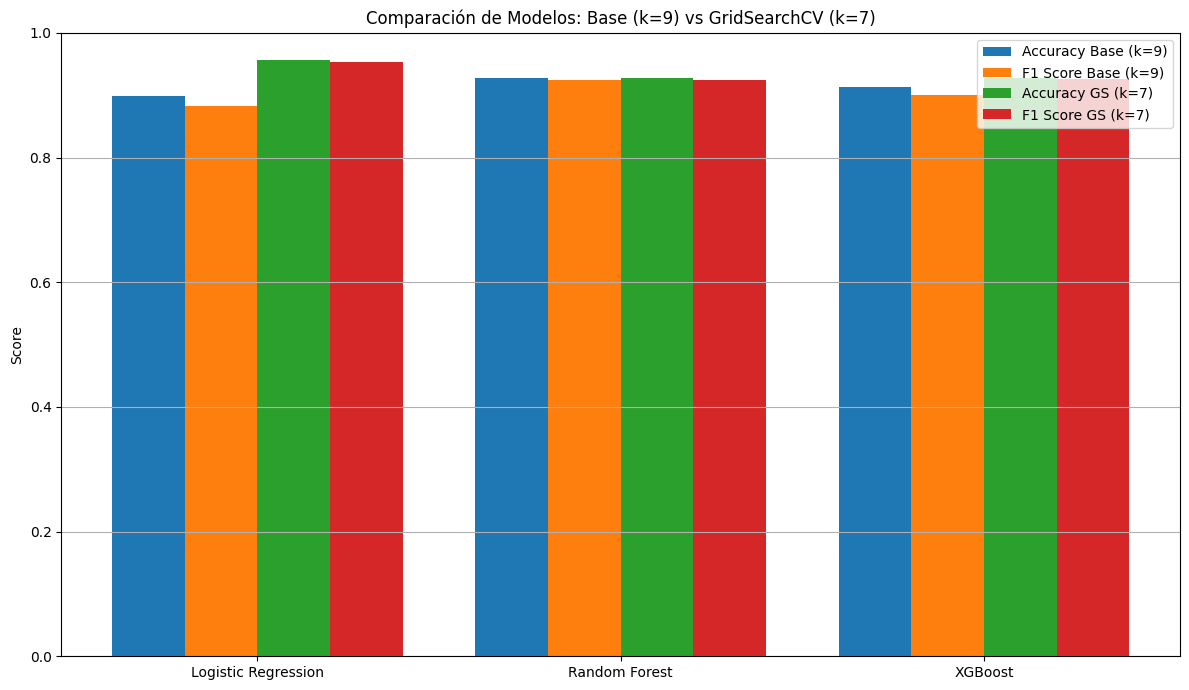

In [ ]:
# Comparación gráfica de resultados (Modelos base vs GS) para k=7

# Asegurarse de que 'resultados' (modelos base con k=9) y 'resultados_gs_7' (modelos GS con k=7) estén definidos
if 'resultados' in globals() and 'resultados_gs_7' in globals():
    model_names_base = list(resultados.keys()) # Nombres de los modelos base (originalmente con k=9)
    model_names_gs_7 = list(resultados_gs_7.keys()) # Nombres de los modelos GS (con k=7)

    # Usaremos los nombres de los modelos base para la comparación, asumiendo que son los mismos modelos.
    common_model_names = list(set(model_names_base) & set(model_names_gs_7))

    if common_model_names:
        # Asegurarse de que las claves de los modelos base existan en resultados_gs_7
        if all(n in resultados_gs_7 for n in common_model_names):
            # Obtenemos los scores de los modelos base (entrenados con k=9)
            accuracies_base_9 = [resultados[n]["accuracy"] for n in common_model_names]
            f1_scores_base_9 = [resultados[n]["f1"] for n in common_model_names]

            # Obtenemos los scores de los modelos GS (entrenados con k=7)
            accuracies_gs_7 = [resultados_gs_7[n]["accuracy"] for n in common_model_names]
            f1_scores_gs_7 = [resultados_gs_7[n]["f1"] for n in common_model_names]

            x = np.arange(len(common_model_names))
            width = 0.2

            plt.figure(figsize=(12,7))

            # Barras para los modelos Base (entrenados con k=9)
            plt.bar(x - width, accuracies_base_9, width, label='Accuracy Base (k=9)')
            plt.bar(x, f1_scores_base_9, width, label='F1 Score Base (k=9)')

            # Barras para los modelos con GridSearchCV (entrenados con k=7)
            plt.bar(x + width, accuracies_gs_7, width, label='Accuracy GS (k=7)')
            plt.bar(x + width*2, f1_scores_gs_7, width, label='F1 Score GS (k=7)')


            plt.ylabel('Score')
            plt.title('Comparación de Modelos: Base (k=9) vs GridSearchCV (k=7)')
            plt.xticks(x + width/2, common_model_names)
            plt.ylim(0,1)
            plt.legend()
            plt.grid(axis='y')
            plt.tight_layout()
            plt.show()
        else:
            print("\nSkipping comparison graph (Base vs GS k=7): Model names in 'resultados' not found in 'resultados_gs_7'.")
    else:
         print("\nSkipping comparison graph (Base vs GS k=7): No common model names found.")
else:
    print("\nSkipping comparison graph (Base vs GS k=7): 'resultados' o 'resultados_gs_7' no encontrados.")
